In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from BuildTardisData import linear_data
from BacktestStrategy import backtest_strategy
from BuildLinearModel import validate_model

In [41]:
df1=pd.read_csv("binance-futures_quotes_2023-04-28_BTCUSDT.csv.gz")
df2=pd.read_csv("binance-futures_trades_2023-04-28_BTCUSDT.csv.gz")
df3=pd.read_csv("binance-futures_quotes_2023-04-27_BTCUSDT.csv.gz")
df4=pd.read_csv("binance-futures_trades_2023-04-27_BTCUSDT.csv.gz")
df5=pd.read_csv("binance-futures_quotes_2023-04-26_BTCUSDT.csv.gz")
df6=pd.read_csv("binance-futures_trades_2023-04-26_BTCUSDT.csv.gz")
df7=pd.read_csv("binance-futures_quotes_2023-04-25_BTCUSDT.csv.gz")
df8=pd.read_csv("binance-futures_trades_2023-04-25_BTCUSDT.csv.gz")

## Optimising for lags and delays by model accuracy 

In [ ]:
# Define the range of values for l and d
l_values = [x for x in range(0,11)]
d_values = [x for x in range(2,21)]

# Create an empty dictionary to store the results
results_dict, results_dict1 = {}, {}

for l in l_values:
    for d in d_values:
        data1 = linear_data(df1, df2, l=l, d=d)
        data2 = linear_data(df3, df4, l=l, d=d)
        data3 = linear_data(df5, df6, l=l, d=d)
        data4 = linear_data(df7, df8, l=l, d=d)
        frames = [data4, data3, data2, data1]
        result = pd.concat(frames)
        train, test = np.split(result, [int(0.8*len(result))])
        # return dictionary with (l,d) tuple as keys and accuracy score as value
        results_dict[(l, d)] = validate_model(train, test, l=l, threshold=0.44, optimise=True)
        
        data1 = linear_data(df1, df2, l=l, d=d, mpb='updated')
        data2 = linear_data(df3, df4, l=l, d=d, mpb='updated')
        data3 = linear_data(df5, df6, l=l, d=d, mpb='updated')
        data4 = linear_data(df7, df8, l=l, d=d, mpb='updated')
        frames = [data4, data3, data2, data1]
        result = pd.concat(frames)
        train, test = np.split(result, [int(0.8*len(result))])
        # return dictionary with (l,d) tuple as keys and accuracy score as value
        results_dict1[(l, d)] = validate_model(train, test, l=l, threshold=0.44, optimise=True)
        

In [4]:
results_dict

{(0, 2): 0.9092658367031011,
 (0, 3): 0.885884591179045,
 (0, 4): 0.8650914215111821,
 (0, 5): 0.8474984555688498,
 (0, 6): 0.8292558362944016,
 (0, 7): 0.7953691526654716,
 (0, 8): 0.7558402814851467,
 (0, 9): 0.7197803787670539,
 (0, 10): 0.6899400887456253,
 (0, 11): 0.6648118890952968,
 (0, 12): 0.6438460214095462,
 (0, 13): 0.6252360070429566,
 (0, 14): 0.6083254001093772,
 (0, 15): 0.5933896134898761,
 (0, 16): 0.5803997199009236,
 (0, 17): 0.5685035656258907,
 (0, 18): 0.5578884318624735,
 (0, 19): 0.548065487816523,
 (0, 20): 0.5394346777472182,
 (1, 2): 0.9099776474077503,
 (1, 3): 0.8832353868812519,
 (1, 4): 0.8595442951534521,
 (1, 5): 0.8406506441046772,
 (1, 6): 0.822791384725785,
 (1, 7): 0.8051435854922879,
 (1, 8): 0.7823203460698216,
 (1, 9): 0.7506977107563922,
 (1, 10): 0.7207329988367853,
 (1, 11): 0.6939684918842512,
 (1, 12): 0.6708531844493603,
 (1, 13): 0.6511792773580484,
 (1, 14): 0.6336436699291796,
 (1, 15): 0.6182304567235353,
 (1, 16): 0.6043450142726311,

In [26]:
results_dict1

{(0, 2): 0.9092484754664024,
 (0, 3): 0.8858744637909707,
 (0, 4): 0.8650726134775476,
 (0, 5): 0.8474680733167147,
 (0, 6): 0.8292297943263233,
 (0, 7): 0.7953850672245443,
 (0, 8): 0.7558807912718771,
 (0, 9): 0.7197832723274353,
 (0, 10): 0.6899617904798833,
 (0, 11): 0.6648393779984606,
 (0, 12): 0.6438330003313141,
 (0, 13): 0.625238900615897,
 (0, 14): 0.6083340808407578,
 (0, 15): 0.593417102512352,
 (0, 16): 0.5804315493414199,
 (0, 17): 0.5684977784465185,
 (0, 18): 0.5578479216068682,
 (0, 19): 0.5480582538318417,
 (0, 20): 0.5394259969530413,
 (1, 2): 0.9099877747958246,
 (1, 3): 0.8832339401094338,
 (1, 4): 0.8595457419273632,
 (1, 5): 0.840646303776664,
 (1, 6): 0.8227942782819799,
 (1, 7): 0.8051421387141904,
 (1, 8): 0.7823015379273427,
 (1, 9): 0.7507165189260825,
 (1, 10): 0.7207243181305231,
 (1, 11): 0.6939410029413169,
 (1, 12): 0.6708560780223007,
 (1, 13): 0.6511879580894289,
 (1, 14): 0.6336263084413001,
 (1, 15): 0.6182362438945346,
 (1, 16): 0.6043435674777881,

Most accurate model:

In [4]:
max(zip(results_dict.values(), results_dict.keys()))

(0.9099776474077503, (1, 2))

In [5]:
max(zip(results_dict1.values(), results_dict1.keys()))

(0.9099877747958246, (1, 2))

In [53]:
def plot(N):
    x = [m for m in results_dict.keys() if m[0]==N]
    y = [results_dict[m] for m in x]
    x = [m[1] for m in x]
    x1 = [m for m in results_dict1.keys() if m[0]==N]
    y1 = [results_dict1[m] for m in x1]
    x1 = [m[1] for m in x1]
    plt.plot(x, y, label='Original')
    plt.plot(x1, y1, label='Updated')
    plt.title(f'({N}, d) Accuracy plot')
    plt.xlabel('Number of delays while calculating MPC')
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.show()

def plott(N):
    x = [m for m in results_dict.keys() if m[1]==N]
    y = [results_dict[m] for m in x]
    x = [m[0] for m in x]
    x1 = [m for m in results_dict1.keys() if m[1]==N]
    y1 = [results_dict1[m] for m in x1]
    x1 = [m[0] for m in x1]
    plt.plot(x, y, label='Original')
    plt.plot(x1, y1, label='Updated')
    plt.title(f'(l, {N}) Accuracy plot')
    plt.xlabel('Number of lags for VOI and OIR used in model')
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.show()

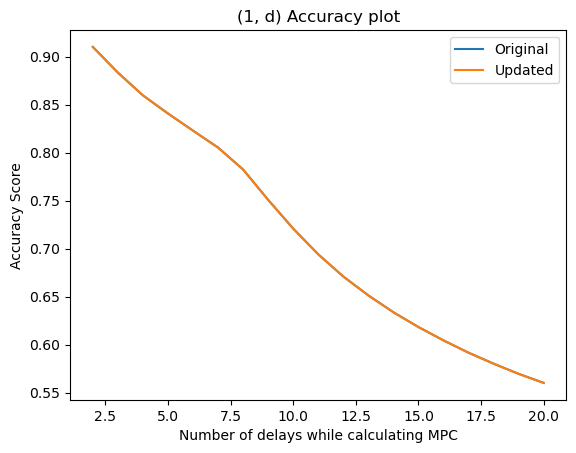

In [54]:
plot(1)

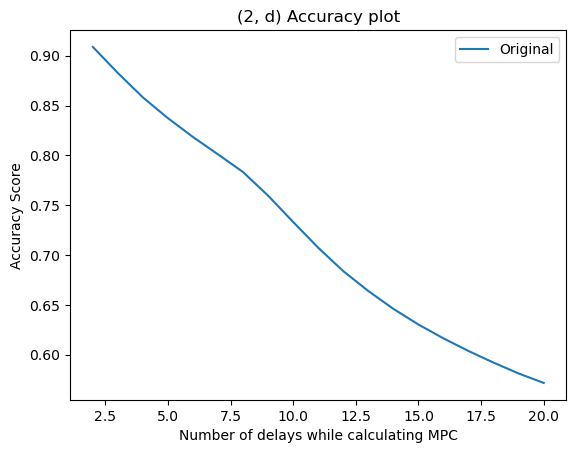

In [5]:
x = [m for m in results_dict.keys() if m[0]==2]
y = [results_dict[m] for m in x]
x = [m[1] for m in x]
plt.plot(x, y, label='Original')
plt.title('(2, d) Accuracy plot')
plt.xlabel('Number of delays while calculating MPC')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

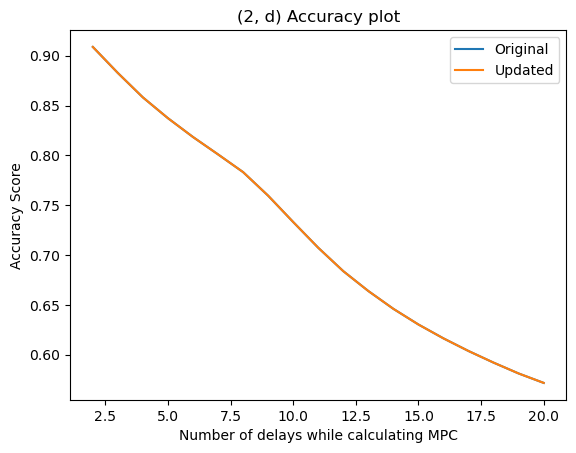

In [55]:
plot(2)

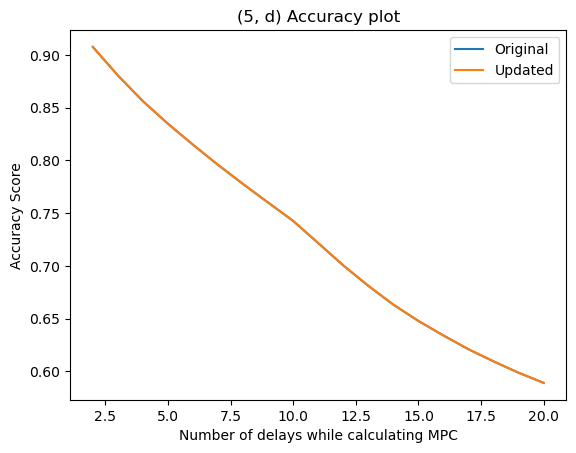

In [56]:
plot(5)

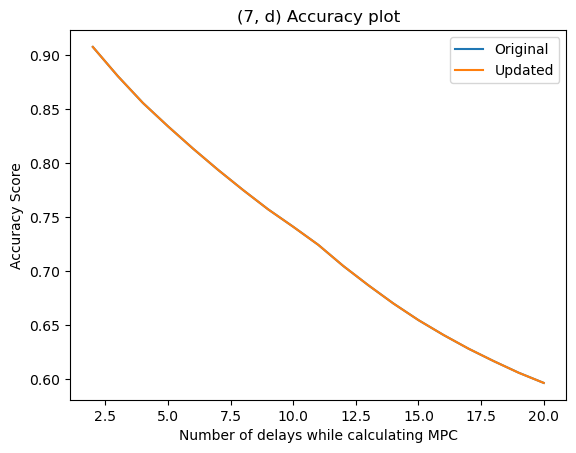

In [57]:
plot(7)

While keeping the number of lags constant we see that model accuracy decreases as the number of delays increase. And this effect is consistent at all lags.

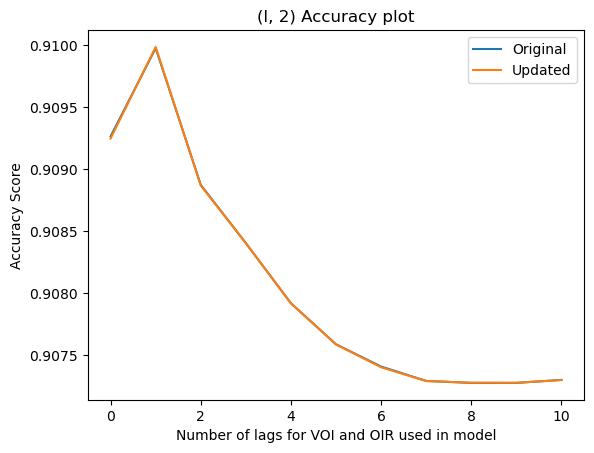

In [58]:
plott(2)

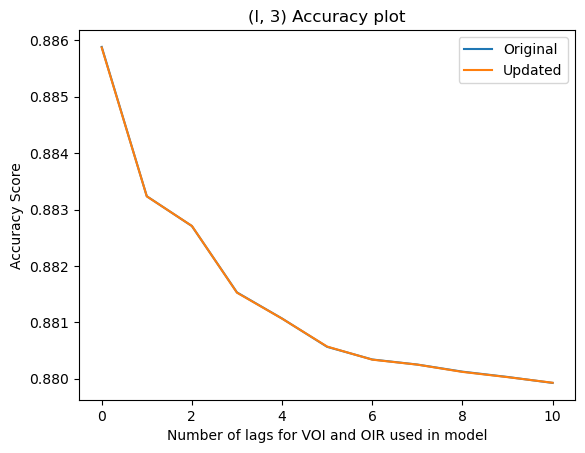

In [59]:
plott(3)

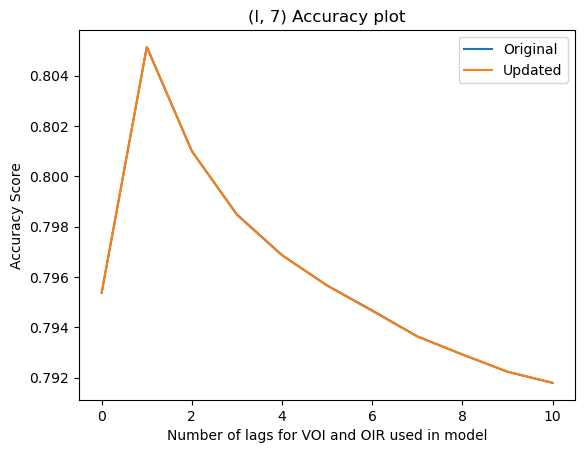

In [60]:
plott(7)

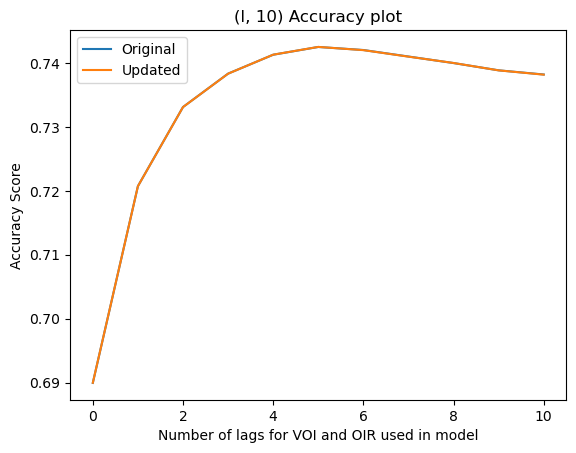

In [61]:
plott(10)

We see that accuracy decrease with an increase in the number of lags while keeping the delays constant. Therefore, the least lag and delay possible should be the most accurate.

This is why we will choose l=1 and d=2. Since the MPC is calculated using the midprice of future d prices, the minimum I have chose to go with is d=2.

### Optimising for threshold while trading on actual MPC

In [8]:
a, b = max(zip(results_dict1.values(), results_dict1.keys()))
l, d = b[0], b[1]
data1 = linear_data(df1, df2, l=l, d=d)
data2 = linear_data(df3, df4, l=l, d=d)
data3 = linear_data(df5, df6, l=l, d=d)

In [35]:
frames = [data1, data2]

result = pd.concat(frames)
#train, test = np.split(result, [int(0.8*len(result))])

#validate_model(train, test, l=l, threshold=0.41, optimise=True)

Model with $(l, d)$ = $(1, 2)$ is the most accurate. Now let's test for the optimal threshold.

I have used the real MPC in `test_data` to trade, signifying the ideal condition of having a fully accurate model. This will give us a better feel for the upper bounds of what the strategy can produce.

#### Threshold between 0.01 and 0.99

Let's look at profits before costs

In [15]:
def profit_plot(data,contract):
    y = [data[x][0] for x in data.keys()]
    plt.plot(data.keys(), y, label=contract)
    plt.title('Gross Profits before Transaction Costs')
    plt.xlabel('Threshold')
    plt.ylabel('Profit')
    plt.legend()
    plt.show()
    
def avg_plot(data,contract):
    y = [data[x][0]/data[x][1] for x in data.keys()]
    plt.plot(data.keys(), y, label=contract)
    plt.title('Average Profits per trade (Before Transaction Costs)')
    plt.xlabel('Threshold')
    plt.ylabel('Profit/Volume')
    plt.legend()
    plt.show()

### Trading Window: 1 day

In [34]:
profits_dict1 = {}
for threshold in [x/100 for x in range(1,100)]:
    df = backtest_strategy(data1, data1, threshold=threshold, l=l, to_test='Real', optimise=True)
    # returns dictionary with threshold as key and (Profit, Volume) as values
    profits_dict1[threshold] = (sum(df["Trade Cost"]), df.iloc[-1,3])

In [48]:
profits_dict1

{0.01: (88081.15107715473, 26574),
 0.02: (88081.15107715473, 26574),
 0.03: (88081.40274382144, 26522),
 0.04: (88081.40274382144, 26522),
 0.05: (88060.77599219835, 26382),
 0.06: (88058.6005733347, 26318),
 0.07: (88058.6005733347, 26318),
 0.08: (88069.65890666805, 26310),
 0.09: (88069.65890666805, 26310),
 0.1: (88014.11542733674, 25986),
 0.11: (87951.95191678972, 25618),
 0.12: (87951.95191678972, 25618),
 0.13: (87941.41855162548, 25594),
 0.14: (87941.41855162548, 25594),
 0.15: (87913.15904257144, 25546),
 0.16: (87886.55083816205, 25478),
 0.17: (87886.55083816205, 25478),
 0.18: (87887.16643871562, 25470),
 0.19: (87887.16643871562, 25470),
 0.2: (87826.3609737914, 25410),
 0.21: (87694.52892611772, 25130),
 0.22: (87694.52892611772, 25130),
 0.23: (87699.10987849874, 25122),
 0.24: (87699.10987849874, 25122),
 0.25: (87659.26478239181, 25066),
 0.26: (87655.08859191567, 25062),
 0.27: (87655.08859191567, 25062),
 0.28: (87674.90369216632, 25046),
 0.29: (87674.90369216632

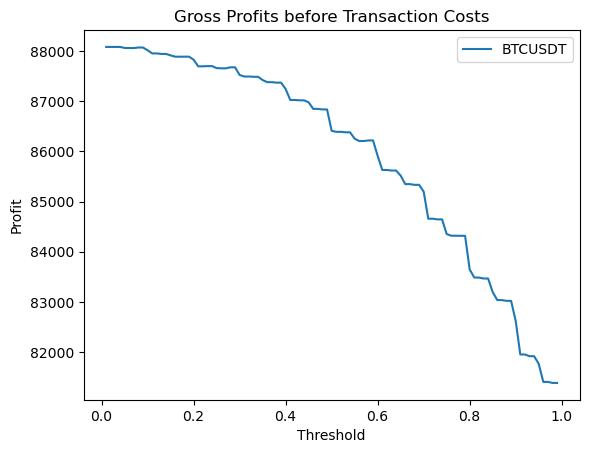

In [63]:
profit_plot(profits_dict1, "BTCUSDT")

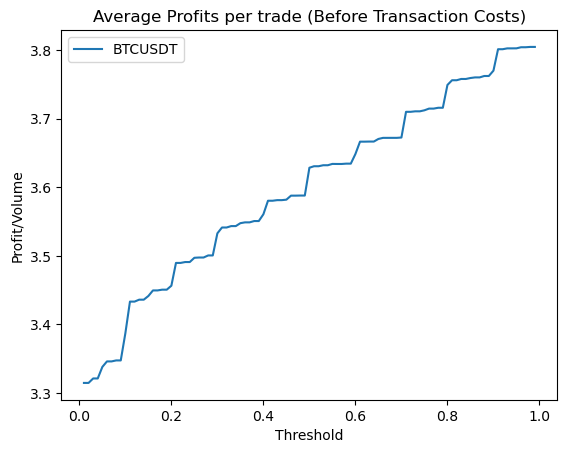

In [64]:
avg_plot(profits_dict1, "BTCUSDT")

### Trading Window: 2 day

In [36]:
profits_dict = {}
for threshold in [x/100 for x in range(1,100)]:
    df = backtest_strategy(result, result, threshold=threshold, l=l, to_test='Real', optimise=True)
    profits_dict[threshold] = (sum(df["Trade Cost"]), df.iloc[-1,3])

In [80]:
profits_dict

{0.01: (283162.2386785994, 85260),
 0.02: (283162.2386785994, 85260),
 0.03: (283166.24583488534, 85088),
 0.04: (283166.24583488534, 85088),
 0.05: (283036.47666854033, 84608),
 0.06: (283014.8244043085, 84388),
 0.07: (283014.8244043085, 84388),
 0.08: (283024.793211147, 84316),
 0.09: (283024.793211147, 84316),
 0.1: (282918.2430208085, 83256),
 0.11: (282780.24163864885, 82220),
 0.12: (282780.24163864885, 82220),
 0.13: (282754.7892641932, 82132),
 0.14: (282754.7892641932, 82132),
 0.15: (282661.5490416296, 81984),
 0.16: (282585.22389740637, 81700),
 0.17: (282585.22389740637, 81700),
 0.18: (282599.414315684, 81640),
 0.19: (282599.414315684, 81640),
 0.2: (282471.71298404515, 81396),
 0.21: (282160.44238473615, 80520),
 0.22: (282160.44238473615, 80520),
 0.23: (282165.38952759316, 80456),
 0.24: (282165.38952759316, 80456),
 0.25: (282000.7787490187, 80272),
 0.26: (281994.30491148366, 80260),
 0.27: (281994.30491148366, 80260),
 0.28: (281997.7555805268, 80180),
 0.29: (2819

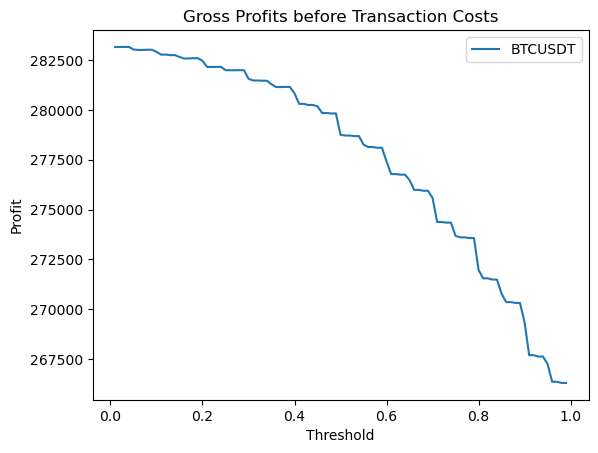

In [65]:
profit_plot(profits_dict, "BTCUSDT")

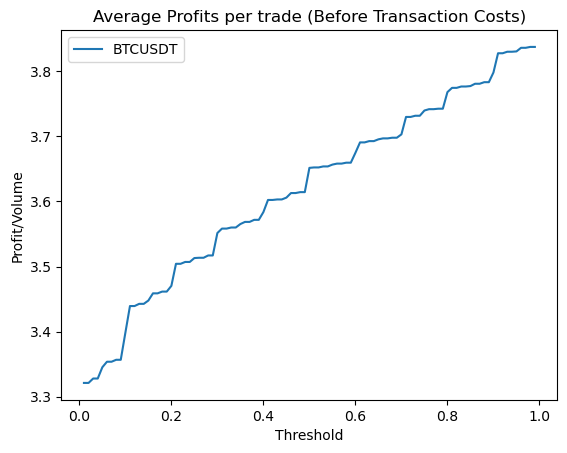

In [66]:
avg_plot(profits_dict, "BTCUSDT")

### Trading Window: 3 day

In [9]:
frames = [data1, data2, data3]

result = pd.concat(frames)

In [16]:
profits_dict2 = {}
for threshold in [x/100 for x in range(1,100)]:
    df = backtest_strategy(result, result, threshold=threshold, l=l, to_test='Real', optimise=True)
    profits_dict2[threshold] = (sum(df["Trade Cost"]), df.iloc[-1,3])

In [20]:
profits_dict2

{0.01: (481646.6729447593, 146174),
 0.02: (481646.6729447593, 146174),
 0.03: (481610.72355635365, 145914),
 0.04: (481610.72355635365, 145914),
 0.05: (481368.07522890624, 145034),
 0.06: (481318.17178328277, 144666),
 0.07: (481318.17178328277, 144666),
 0.08: (481348.05038358073, 144486),
 0.09: (481348.05038358073, 144486),
 0.1: (481246.77133950463, 142770),
 0.11: (481005.4901040034, 141034),
 0.12: (481005.4901040034, 141034),
 0.13: (480913.78747204697, 140910),
 0.14: (480913.78747204697, 140910),
 0.15: (480729.07251105184, 140610),
 0.16: (480623.2542659586, 140110),
 0.17: (480623.2542659586, 140110),
 0.18: (480631.56318780564, 139938),
 0.19: (480631.56318780564, 139938),
 0.2: (480456.34382390155, 139514),
 0.21: (479938.5700128433, 137994),
 0.22: (479938.5700128433, 137994),
 0.23: (479986.17289379565, 137842),
 0.24: (479986.17289379565, 137842),
 0.25: (479717.6541898944, 137354),
 0.26: (479717.17590791505, 137318),
 0.27: (479717.17590791505, 137318),
 0.28: (4796

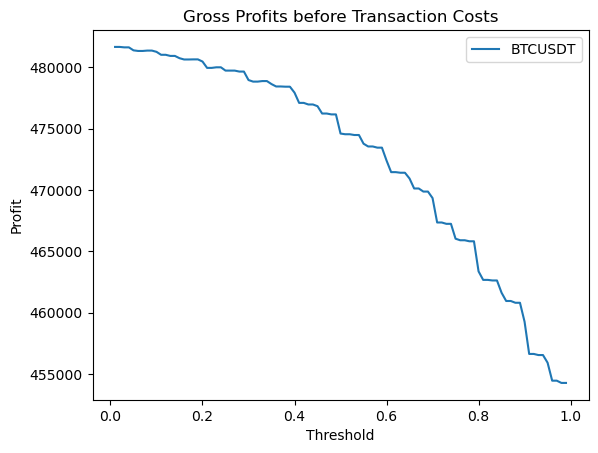

In [17]:
profit_plot(profits_dict2, "BTCUSDT")

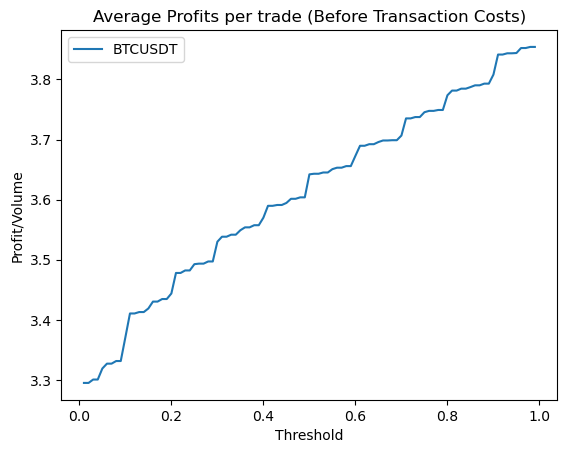

In [18]:
avg_plot(profits_dict2, "BTCUSDT")

### Looking at net profits after transaction costs:

In [81]:
def profit_plot(data,contract):
    y = [data[x][0] for x in data.keys()]
    plt.plot(data.keys(), y, label=contract)
    plt.title('Total Profits after Transaction Costs')
    plt.xlabel('Threshold')
    plt.ylabel('Profit')
    plt.legend()
    plt.show()
    
def avg_plot(data,contract):
    y = [data[x][0]/data[x][1] for x in data.keys()]
    plt.plot(data.keys(), y, label=contract)
    plt.title('Average Total Profits per trade')
    plt.xlabel('Threshold')
    plt.ylabel('Profit/Volume')
    plt.legend()
    plt.show()
    
def vol_plot(data,contract):
    y = [data[x][1] for x in data.keys()]
    plt.plot(data.keys(), y, label=contract)
    plt.title('Trade Volume')
    plt.xlabel('Threshold')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

### Trading Window: 1 day

In [27]:
Profits_dict1 = {}
for threshold in [x for x in range(1,60)]:
    df = backtest_strategy(data1, data1, threshold=threshold, l=l, to_test='Real', optimise=True)
    # returns dictionary with threshold as key and (Profit, Volume) as values
    Profits_dict1[threshold] = (df.iloc[-1,6], df.iloc[-1,3])

In [28]:
Profits_dict1

{1: (-46435.067597212925, 20926),
 2: (-24064.759868875648, 13874),
 3: (-7298.696134862657, 7750),
 4: (-1096.3153559999046, 4402),
 5: (2816.225500317785, 2568),
 6: (3916.341563305923, 1640),
 7: (2569.259080983017, 1084),
 8: (1668.812732381115, 714),
 9: (1200.286173471994, 488),
 10: (472.10019393818175, 356),
 11: (-70.73800174512712, 260),
 12: (-726.1653521206053, 184),
 13: (-1040.626300265587, 158),
 14: (-326.80149834443637, 118),
 15: (-438.5034326382852, 90),
 16: (-830.4672202353324, 70),
 17: (-104.25668224533354, 60),
 18: (-451.42798741200215, 52),
 19: (-313.6565120119992, 52),
 20: (-381.6515692036663, 40),
 21: (-1160.4885835647729, 28),
 22: (-1195.8400515769924, 28),
 23: (-1355.0004318903214, 28),
 24: (-1407.8202522192175, 28),
 25: (-1386.6173372436529, 28),
 26: (-1563.4805970036482, 24),
 27: (-853.7538382436543, 20),
 28: (-177.47526352142546, 10),
 29: (344.94932507856873, 8),
 30: (344.94932507856873, 8),
 31: (744.4320008785702, 8),
 32: (349.78956327856

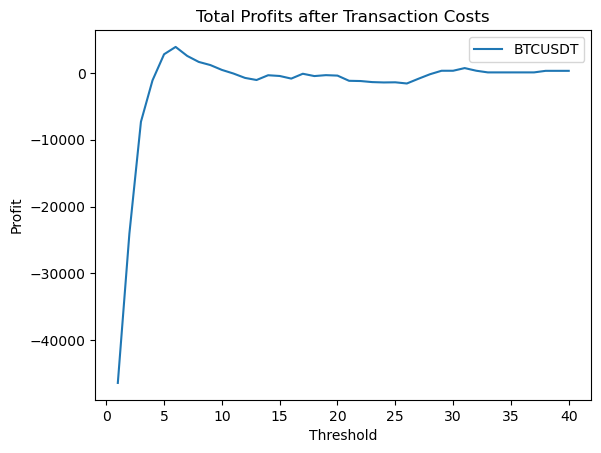

In [69]:
profit_plot(Profits_dict1, "BTCUSDT")

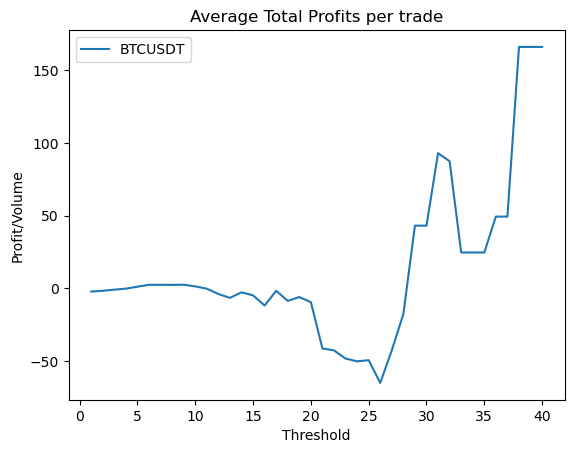

In [70]:
avg_plot(Profits_dict1, "BTCUSDT")

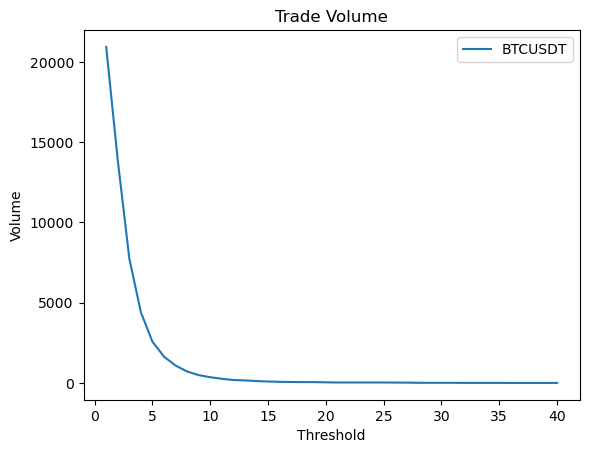

In [82]:
vol_plot(Profits_dict1, "BTCUSDT")

### Trading Window: 2 day

In [77]:
frames = [data1, data2]

result = pd.concat(frames)

In [19]:
Profits_dict = {}
for threshold in [x for x in range(1,100)]:
    df = backtest_strategy(result, result, threshold=threshold, l=l, to_test='Real', optimise=True)
    Profits_dict[threshold] = (df.iloc[-1,6], df.iloc[-1,3])

In [22]:
Profits_dict

{1: (-147443.39786450536, 68004),
 2: (-75153.20973815015, 46776),
 3: (-21616.561768964224, 27974),
 4: (1790.210425176614, 16634),
 5: (15324.089970383997, 10126),
 6: (16182.563049035976, 6626),
 7: (15212.787390874466, 4406),
 8: (10920.399712753515, 3022),
 9: (9589.704313839504, 2104),
 10: (7369.381247564854, 1550),
 11: (4781.2677862932005, 1166),
 12: (2944.1447388547203, 846),
 13: (2745.9473973379936, 686),
 14: (2014.2242285392554, 506),
 15: (1452.7086561462388, 402),
 16: (1245.9028226326761, 298),
 17: (262.3096249842324, 242),
 18: (26.019812776858316, 210),
 19: (122.05053251810182, 182),
 20: (-1207.722038921996, 142),
 21: (-2001.3337234830988, 114),
 22: (-1850.9308071008804, 100),
 23: (-2028.2051382270033, 88),
 24: (-2482.8202288685848, 88),
 25: (-2821.929370959677, 82),
 26: (-3536.4606130196635, 70),
 27: (-2990.3677194596685, 66),
 28: (-1665.9635311955649, 46),
 29: (-1825.326942475567, 36),
 30: (-1825.326942475567, 36),
 31: (-1390.5610881612731, 32),
 32:

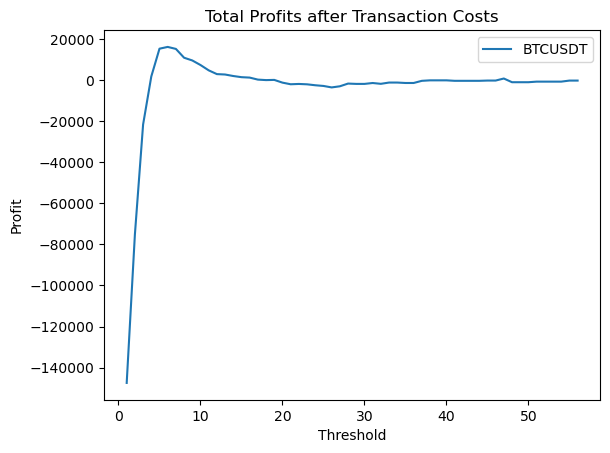

In [71]:
profit_plot(Profits_dict, "BTCUSDT")

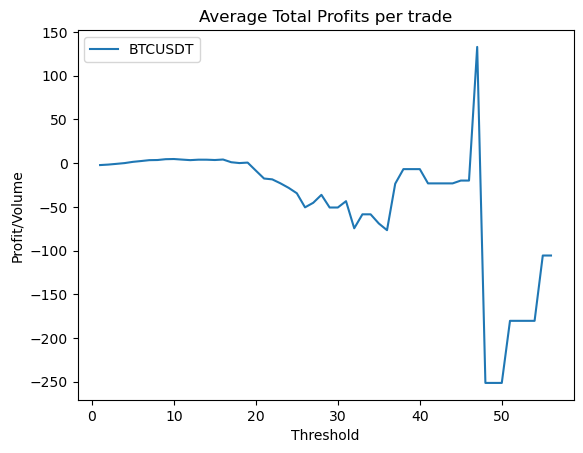

In [72]:
avg_plot(Profits_dict, "BTCUSDT")

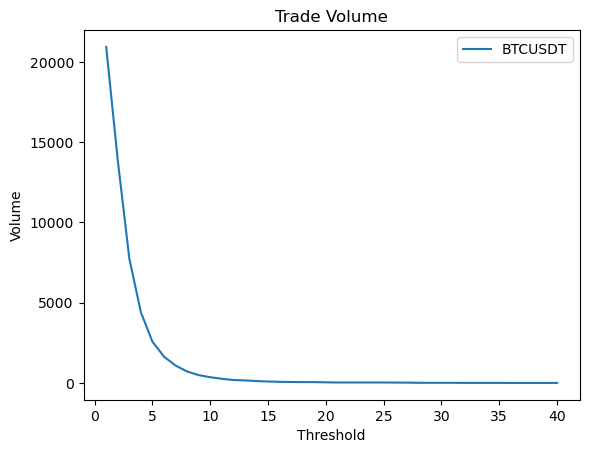

In [83]:
vol_plot(Profits_dict1, "BTCUSDT")

### Trading Window: 3 day

In [31]:
frames = [data1, data2, data3]

result = pd.concat(frames)

In [75]:
Profits_dict3 = {}
for threshold in [x for x in range(0,70)]:
    df = backtest_strategy(result, result, threshold=threshold, l=l, to_test='Real', optimise=True)
    Profits_dict3[threshold] = (df.iloc[-1,6], df.iloc[-1,3])

In [76]:
Profits_dict3

{1: (-242800.33593140944, 115486),
 2: (-118908.96595022234, 80088),
 3: (-30376.43543592826, 48768),
 4: (8833.59320880493, 29646),
 5: (30028.814958031595, 18566),
 6: (32850.880133985, 12334),
 7: (33359.77498860288, 8438),
 8: (26363.517985950843, 6006),
 9: (22316.578730035024, 4316),
 10: (21840.848812461325, 3232),
 11: (17733.063750968242, 2482),
 12: (14385.912200085611, 1878),
 13: (11761.549680196813, 1526),
 14: (12874.059707583947, 1170),
 15: (10195.99787291864, 978),
 16: (9812.356515925814, 778),
 17: (7212.633487398676, 658),
 18: (6717.905651025703, 570),
 19: (5264.157476275363, 478),
 20: (4396.044908761933, 394),
 21: (3271.2367245233345, 330),
 22: (0.7000192596369743, 286),
 23: (-969.3330491237402, 258),
 24: (-1550.1502208494187, 242),
 25: (-429.1221642028836, 222),
 26: (-1182.663421666207, 198),
 27: (816.6854601586924, 174),
 28: (2605.9227179369145, 142),
 29: (-43.58247381808121, 126),
 30: (-1133.3606586180595, 122),
 31: (-772.7804793419882, 110),
 32: 

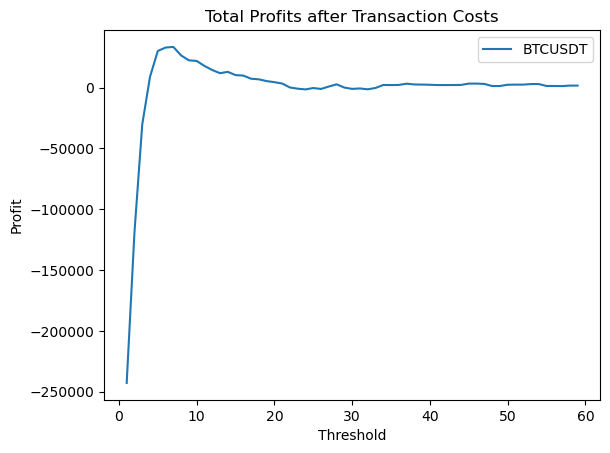

In [73]:
profit_plot(Profits_dict3, "BTCUSDT")

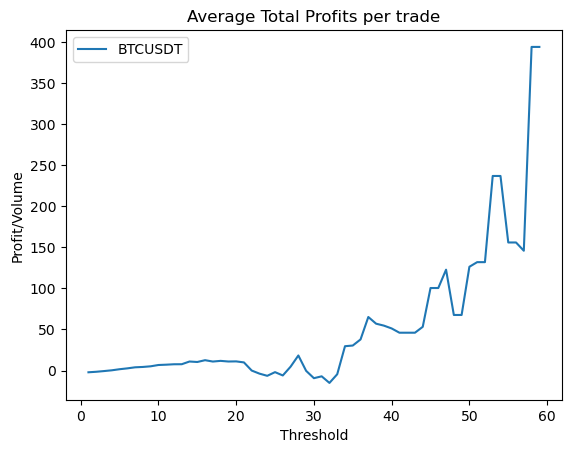

In [74]:
avg_plot(Profits_dict3, "BTCUSDT")

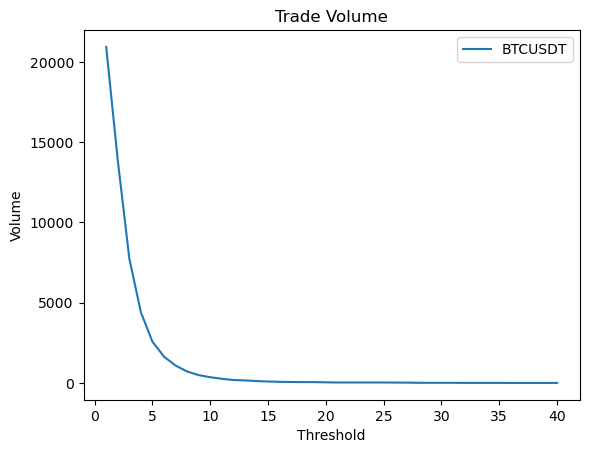

In [84]:
vol_plot(Profits_dict1, "BTCUSDT")